In [2]:
import json

all_results = {}

for i in range(1,6):
    path = f"errCorr_llama3_trial{i}/testingSetScores.json"
    with open(path, "r") as f:
        results = json.load(f)
        all_results[f"trial{i}"] = results

In [20]:
prompt_deltas = {}

for trial in all_results:
    for k,v in all_results[trial].items():
        initial_score = next(iter(v["initial_prompt"].values()))
        optimized_score = next(iter(v["optimized_prompt"].values()))
        prompt_deltas[k] = prompt_deltas.get(k, []) + [optimized_score - initial_score]
        
print(prompt_deltas)

{'Please format the following raw transcript for readability, including punctuation, speaker labels (look for semicolons after names), and spacing. Remove filler words:\n\nPLACEHOLDER\n': [17.928385143820105, 24.758997200597335, 32.386008771677766, 15.69378061066389, 41.77708015897326], 'You are a helpful assistant for Aidan. Your task is to correct any spelling discrepancies in the transcribed text. Only add necessary punctuation such as periods, commas, and capitalization, and use only the context provided. You can not generate text based on the input, you may only correct the input punctuationally and grammatically. If the transcribed text is blank then do not return anything\n\nPLACEHOLDER': [13.120992001359895, 18.96269466615952, 6.080818128589101, 12.61165004299049, 9.782970206564102], 'Correct the grammar in the sentence: PLACEHOLDER': [42.842103643272566, 12.379351621364853, 37.433994278715794, 53.65021178331348, 21.818304061382904], 'Reformat the following transcript into Mark

### Variance of Prompts Improvements

##### **Llama3, Over 5 Trials**

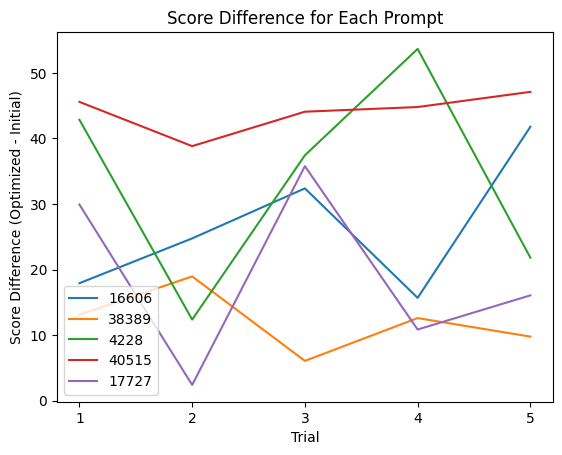

{16606: 'Please format the following raw transcript for readability, including punctuation, speaker labels (look for semicolons after names), and spacing. Remove filler words:\n\nPLACEHOLDER\n',
 38389: 'You are a helpful assistant for Aidan. Your task is to correct any spelling discrepancies in the transcribed text. Only add necessary punctuation such as periods, commas, and capitalization, and use only the context provided. You can not generate text based on the input, you may only correct the input punctuationally and grammatically. If the transcribed text is blank then do not return anything\n\nPLACEHOLDER',
 4228: 'Correct the grammar in the sentence: PLACEHOLDER',
 40515: 'Reformat the following transcript into Markdown, bolding the speakers. Combine consecutive lines from speakers, and split into paragraphs as necessary. Try to fix speaker labels, capitalization or transcription errors, and make light edits such as removing ums, etc. There is some Danish, please italicize the Da

In [67]:
from matplotlib import ticker
import matplotlib.pyplot as plt

encodings = {}
def encode(prompt): 
    res = sum(list(map(lambda x: ord(x), list(prompt))))
    encodings[res] = prompt
    return res
decode = lambda encoding: encodings[encoding]

for prompt in prompt_deltas:
    plt.plot(range(1,6), prompt_deltas[prompt], label=encode(prompt))
plt.legend(loc='lower left')
plt.xlabel("Trial")
plt.ylabel("Score Difference (Optimized - Initial)")
plt.title("Score Difference for Each Prompt")
# Set x-axis to display integers only
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()
encodings

In [103]:
import numpy as np
import pandas as pd

variances = {}

for prompt in prompt_deltas:
    variances[prompt] = np.var(prompt_deltas[prompt])

variances = pd.Series(variances)
variances.sort_values(ascending=False, inplace=True)
print(f"Highest to lowest delta variance: \n{variances}")

Highest to lowest delta variance: 
Correct the grammar in the sentence: PLACEHOLDER                                                                                                                                                                                                                                                                                                                                                                                                     218.249638
Please fix the grammatical errors in this English translation of Bhagavad Gita. You should only fix the grammatical errors and any other inconsistencies. Do not change the meaning.\n\nPLACEHOLDER                                                                                                                                                                                                                                                  150.034730
Please format the following raw transcript for readability, including

##### **Mistral**

In [87]:
path = "errCorr_mistral_trial1/testingSetScores.json"
with open(path, "r") as f:
    mistral_results = json.load(f)

mistral_deltas = {}

for k,v in mistral_results.items():
    initial_score = next(iter(v["initial_prompt"].values()))
    optimized_score = next(iter(v["optimized_prompt"].values()))
    mistral_deltas[k] = optimized_score - initial_score

# # plot each mistral prompt results as horizontal lines
# import matplotlib.pyplot as plt
# from itertools import cycle

# # Define a list of colors
# colors = cycle(['red', 'green', 'blue', 'orange', 'purple', 'brown'])

# for k, v in mistral_deltas.items():
#     plt.axhline(y=v, label=encode(k), color=next(colors))
# plt.legend(loc='lower left')
# plt.xlabel("Trial")
# plt.ylabel("Score Difference (Optimized - Initial)")
# plt.title("Score Difference for Each Prompt")
# plt.show()

# encodings

print(f"Average Delta for Mistral: {sum(mistral_deltas.values()) / len(mistral_deltas)}")

Average Delta for Mistral: 28.768315015765495


##### **Phi**

In [90]:
path = "errCorr_phi_trial1/testingSetScores.json"
with open(path, "r") as f:
    phi_results = json.load(f)

phi_deltas = {}

for k,v in phi_results.items():
    initial_score = next(iter(v["initial_prompt"].values()))
    optimized_score = next(iter(v["optimized_prompt"].values()))
    phi_deltas[k] = optimized_score - initial_score


print(f"Average Delta for Phi: {sum(phi_deltas.values()) / len(phi_deltas)}")

Average Delta for Phi: 4.177615997693192


##### **Gemma**

In [92]:
path = "errCorr_gemma_trial1/testingSetScores.json"
with open(path, "r") as f:
    gemma_results = json.load(f)

gemma_deltas = {}

for k,v in gemma_results.items():
    initial_score = next(iter(v["initial_prompt"].values()))
    optimized_score = next(iter(v["optimized_prompt"].values()))
    gemma_deltas[k] = optimized_score - initial_score


print(f"Average Delta for Gemma: {sum(gemma_deltas.values()) / len(gemma_deltas)}")

Average Delta for Gemma: 0.6426530315724364
